# Representation of signals & inverse problems - G1-G2
---
## Lab 1: Introduction to time-frequency analysis

---
## Guidelines (read carefully before starting)

**Objective**: This practical session consists in a series of 6 short exercises introducting the time-frequency analysis of sounds (acoustic signals).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2;
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

Assessmment based on your answer to the exercises reported in the notebook and any additional `.py` file produced. Custom code should be commented whenever appropriate. Figures should be clearly annotated (axes, title).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Answers to the questions and overall presentation of the Jupyter notebook.

**Remark**: some of the Python modules used in this lab session are:

* the [`numpy.fft` package](https://docs.scipy.org/doc/numpy/reference/routines.fft.html), providing implementation of the standard Fourier transforms and related tools;
* the [`scipy.signal` package](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal), containing several functions to perform various operations on signals

## Contents <a id="content"></a>

1. [Section 1](#section1): Fourier analysis (spectral analysis)
   - [Exercise 1](#ex1) 
2. [Section 2](#section2): Fourier analysis of segments
   - [Exercise 2](#ex2) 
   - [Exercise 3](#ex3) 
3. [Section 3](#section3): Introduction to time-frequency analysis 
   - [Exercise 4](#ex4) 
4. [Section 4](#section4): Analysis of some signals
   - [Exercise 5](#ex5) 
   - [Bonus: Exercise 6](#ex6) 

## Configuration 

In [4]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import scipy.io.wavfile as scwav
import scipy.signal as sg
from IPython.display import Audio
from ipywidgets import fixed, interact, interact_manual, interactive
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Section 1: Fourier analysis (spectral analysis) <a id="section1"></a> [(&#8593;)](#content)

### Reading, displaying, listening to a signal

Signals can be represented as 1D vectors, stored as a row or a column vector. Several sound files signals are available in the `sounds` folder.

The following instruction reads a signal from a `.wav` file (song of a bird), with `fs` the sampling frequency loaded from the file.

In [5]:
fs, x = scwav.read("sounds/bird.wav")

Audio(x, rate=fs)

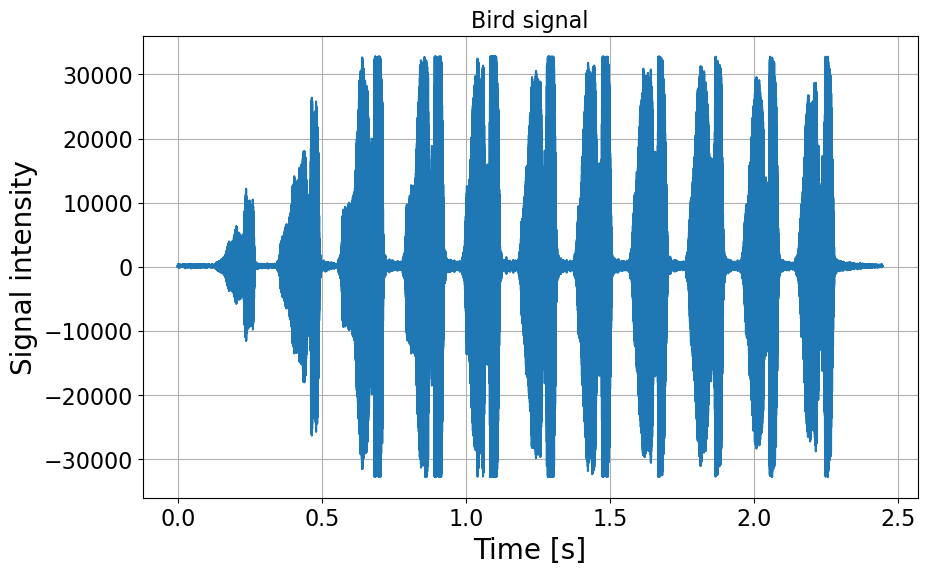

In [6]:
# time samples corresponding to x
t = np.arange(0, x.size) / fs

plt.figure(figsize=(10, 6))
plt.plot(t, x)
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Signal intensity")
plt.title("Bird signal")
plt.show()

- One can visualize a small segment of the signal in the time domain and observe its oscillatory behaviour.

In [ ]:
# first instant in the considered time interval
t0 = 0.18

# time interval duration
T = 0.02

# time instants within the time interval considered
t = np.linspace(t0, t0 + T, int(fs * T))

plt.figure(figsize=(12, 6))
plt.plot(t, x[int(fs * t0) : int(fs * (t0 + T))])
plt.xlabel(r"$t$ [s]", fontsize=18)
plt.ylabel(r"$x(t)$", fontsize=18)
plt.show()

- For the rest of the lab, we consider a limited portion of the signal, composed of `N` samples.

In [ ]:
N = 2**15
x = x[:N]

In [ ]:
plt.figure()
plt.plot(x)
plt.grid()
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Bird signal")
plt.show()

### Fourier transform of the signal

One can first compute the discrete Fourier transform of the signal and display its modulus to have an idea about the distribution of its energy in the frequency space (remember that $S_x(\nu) = |X(\nu)|^2$ for continous-time signal of finite energy, with $S_x$ the energy spectral density of $x$). 

The frequencies at which the discrete Fourier transform is computed go from $0$ to $(N-1)\frac{f_s}{N}$ (with $n$ the number of signal samples), with a regular frequency step $\frac{f_s}{N}$.

In [ ]:
Fx = np.fft.fft(x)

# list of frequencies associated with the DFT
freq = np.arange(0, N) * (fs / N)

plt.figure()
plt.plot(freq, np.abs(Fx))
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$|Fx|$")
plt.grid()
plt.show()

For a better readability and to highlight the Hermitian symmetry of the Fourier transform of real signals, the `np.fft.fftshift` function centers frequencies around $0$, between $ -\frac{f_s}{2} $ and $ (N-1)\frac{f_s}{2N}$.

One can use the `np.fft.fftfreq` function to automatically access the associated list of frequencies.

> *Remark*: note that the `np.fft.fftfreq` function produces frequencies from 0 to $f_s/2$ followed by frequencies from $-f_s/2$ to $0$.

In [ ]:
Fx_shift = np.fft.fftshift(Fx)
freq = np.fft.fftshift(np.fft.fftfreq(N, d=1.0 / fs))

plt.figure()
plt.plot(freq, abs(Fx_shift))
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$|Fx|$")
plt.grid()
plt.show()

### Exercise 1 <a id="ex1"></a> [(&#8593;)](#content)
1. What is the value of the sampling frequency `fs` used above? What does it correspond to?
2. What are the characteristic frequency bands of the bird song studied here?

- <p style="color:rgb(137, 207, 240);">Your answers to exercise 1...</p>

---
## Section 2 : Fourier analysis of segments <a id="section2"></a> [(&#8593;)](#content)

The Fourier transform only gives access to a global information on the frequency content of the signal. A "local" Fourier analysis would be useful to have a more precise description of the sound, such as local amplitude and local frequency variations (local in the temporal domain).

- In this section, we will compute the Fourier transform of various segments of the signal, centered around time instants `tk`, and represent its modulus to illustrate the variations of the local frequency content of the signal across time. Detailed steps are reported at the end of this section.
- We will consider windowed segments of the signal `w*x`, with `w` a Gaussian window centered in `tk` containing $2M+1$ samples, with $M=400$ and standard deviation $\sigma = 200$.
    
> **Indication :** to build a Gaussian window, use [the function `scipy.signal.get_window`](
https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions).
> Useful code examples are given below.

In [ ]:
t = np.arange(0, x.size) / fs  # list of times considered

# reference time sample
# corresponds to the time instant t0 = (n0-1)/fs
n0 = 10000

# half width of the analysing window
M = 400

# number of samples considered per segment
L = 2 * M + 1

# sample indices of the selected segment
sel = np.arange(n0 - M, n0 + M + 1, 1)

# generating a Gaussian time-window with variance sigma
sigma = 200
gauss_win = sg.get_window(("gaussian", sigma), L)

### Displaying the window as a function of time

In [ ]:
plt.figure()
plt.plot(t[sel], gauss_win)
plt.xlabel("Time [s]")
plt.ylabel("Window amplitude")
plt.grid()
plt.show()

### Extraction of a windowed signal segment for local Fourier analysis

Segment extraction and multiplication with the observation window centered around the sample $n_0$ (corresponding time insntant $t_0 = (n_0-1)/f_s$).

In [ ]:
x_segment = gauss_win * x[sel]

plt.figure()
plt.plot(t[sel], x_segment)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude of $wx$")
plt.title("Signal segment around $t_0$={0:1.2f} s".format(t[n0]))
plt.grid()
plt.show()

### Amplitude of the DFT coefficients of the windowed time-segment

In [ ]:
Fx_segment = np.fft.fftshift(np.fft.fft(x_segment))
freq = np.fft.fftshift(np.fft.fftfreq(Fx_segment.size, d=1.0 / fs))

plt.figure()
plt.plot(freq, np.abs(Fx_segment))
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$|F(wx)|$")
plt.title("Spectrum of the time segment around $t_0$={0:1.2f} s".format(t[n0]))
plt.grid()
plt.show()

### Exercice 2 <a id="ex2"></a> [(&#8593;)](#content)

1. Adapting the code above, fompute the Fourier transform of a segment of the signal around different values of `t0` (corresponding to the time sample `n0 = t0*fs`), for `n0` = 1000 to 10000 in steps of 1000. Use a Gaussian window of width $ 2M + 1 $ samples, with $ M = 400 $ and $ \sigma = 200 $.
   
2. Observe the results obtained and comment.

3. What does the segmented analysis highlight?

4. Display the Gaussian window for different values of $\sigma$ ($=50, 100$ et $200$ for instance) as well as its product with the local segment of signal `x[sel]` around the sample $n_0 = 10000$.

5. For each value of $\sigma$ (width of the Gaussian window), compute the Fourier transform of the window. Observe & comment.

6. Compute the Fourier transform of the segment of signal around the sample $n_0 = 10000$ obtained in question 4. (i.e., for the different values of $\sigma$). Observe and comment.

7. Why do we multiply the segment of signal with a Gaussian (or other) window before computing its Fourier transform ? 
    > Indication: Compare the modulus of the DFT obtained with and without the Gaussian window. Focus on a few frequencies for the comparison.

8. For $\sigma=200$, write a `for` loop to repeat the previous analysis on one or two segments at various instants $t_k = n_k / f_s$, for $n_k=10000$ to $n_k=20000$ with a step of $5000$.

9. Using the code below, represent the sum of all these spectra altogether on one graph. What do you notice in comparison with the full spectrum of the signal $x$ displayed earlier?

- <p style="color:rgb(137, 207, 240);">Your answers to exercise 2...</p>
- <p style="color:rgb(137, 207, 240);">Your answers to exercise 3...</p>
- <p style="color:rgb(137, 207, 240);">Your answers to exercise 5...</p>
- <p style="color:rgb(137, 207, 240);">Your answers to exercise 6...</p>
- <p style="color:rgb(137, 207, 240);">Your answers to exercise 7...</p>
- <p style="color:rgb(137, 207, 240);">Your answers to exercise 9...</p>

In [ ]:
# Indication to sum several spectra from successive time segments

# half width of the analysing window
M = 400

# number of samples considered per segment
L = 2 * M + 1

# generating a Gaussian time-window with variance sigma
sigma = 200
gauss_win = sg.get_window(("gaussian", sigma), L)
freq = np.fft.fftshift(np.fft.fftfreq(L, d=1.0 / fs))


# indices of the samples composing the selected segment
n0 = M
sel = np.arange(n0 - M, n0 + M + 1, 1)
x_segment = gauss_win * x[sel]
Xf_sum = np.fft.fftshift(np.fft.fft(x_segment))

# loop over successive segments, spaced by L samples
for n0 in range(M, len(x) - L, M):
    # indices of the samples composing the selected segment
    sel = np.arange(n0 - M, n0 + M + 1, 1)
    x_segment = gauss_win * x[sel]
    Xf_sum += np.fft.fftshift(np.fft.fft(x_segment))
abs_Xf_sum = np.abs(Xf_sum)

In [ ]:
plt.figure()
plt.plot(freq, abs_Xf_sum)
plt.xlabel("Frequency [Hz]", fontsize=18)
plt.ylabel(r"$| \sum_{q} F (w_q x) |$", fontsize=18)
plt.show()

### Exercise 3 : A dynamic plot of the Short-Time Fourier Transform <a id="ex3"></a> [(&#8593;)](#content) 

1. Move the cursor in the figure below to explore the signal in time and frequency

2. Briefly comment on your observations, in line with exercise 2.

<p style="color:rgb(137, 207, 240);">Your answers...</p>

In [ ]:
fs = 44100
N = x.size
xmin = np.min(x)
xmax = np.max(x)

M = 200
L = 2 * M + 1
sigma = 100
gauss_win = sg.get_window(("gaussian", sigma), L)
freq = np.fft.fftshift(np.fft.fftfreq(L, d=1.0 / fs))

In [ ]:
# interactive plot
# DO NOT MODIFY THIS CELL


def local_dft_magnitude(
    x: np.ndarray,
    xmin: float,
    xmax: float,
    t: np.ndarray,
    freq: np.ndarray,
    window,
    center: int,
):
    L = window.size
    half_width = L // 2
    select = np.s_[center - half_width : center + half_width + 1]
    x_segment = window * x[select]
    abs_Fx = np.fft.fftshift(np.abs(np.fft.fft(x_segment)))

    fig = plt.figure(figsize=(18, 6), layout="constrained")
    gs = GridSpec(3, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, :])

    ax1.plot(t, x)
    ax1.ticklabel_format(style="scientific", axis="y", scilimits=(1, 2))
    ax1.vlines(
        [t[center - half_width], t[center + half_width]],
        xmin,
        xmax,
        transform=ax1.get_xaxis_transform(),
        colors="r",
    )
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel(r"$x(t)$")
    ax1.grid(True)

    ax2.plot(t[select], x[select])
    ax2.set_ylim(xmin, xmax)
    ax2.ticklabel_format(style="scientific", axis="y", scilimits=(1, 2))
    ax2.set_xlabel("Time [s]")
    ax2.set_ylabel(r"Segment $x(t)$")
    ax2.grid(True)

    ax3.plot(t[select], x_segment)
    ax3.set_ylim(xmin, xmax)
    ax3.ticklabel_format(style="scientific", axis="y", scilimits=(1, 2))
    ax3.set_xlabel("Time [s]")
    ax3.set_ylabel(r"$w_{t_0}(t) x(t)$")
    ax3.grid(True)

    ax4.plot(freq, abs_Fx)
    # ax4.set_ylim(fmin, fmax)
    ax4.ticklabel_format(style="scientific", axis="both", scilimits=(1, 2))
    ax4.set_ylabel(r"$|F(x w_{t_0})|$")
    ax4.set_xlabel("Frequency [Hz]")
    ax4.grid(True)

    plt.show()


interact(
    local_dft_magnitude,
    x=fixed(x),
    xmin=fixed(xmin),
    xmax=fixed(xmax),
    t=fixed(t),
    freq=fixed(freq),
    window=fixed(gauss_win),
    center=(M, N - L + 1, 1000),
)

---
## Section 3: Introduction to time-frequency analysis <a id="section3"></a> [(&#8593;)](#content)

### Short-Time Fourier Transform: spectrogram & reconstruction

The computation of the *Short-Time Fourier Transform* (STFT) first consists in dividing the time signal into short, overlapping segments of equal length. A Fourier transform is then computed separately for each of the extracted segments. The STFT gathers local Fourier transforms (vertical frequency axis) calculated on regularly spaced time windows (horizontal time axis) so as to deduce the **spectrogram**, a 2D visual heat map. It is defined as the squared modulus of the STFT, interpreted as a time-frequency density of energy.

In general, windows overlap in time, which leads to a certain redundancy enhancing the readability of the time-frequency information. This redundant representation can be reversed (_pseudo-inverse_) to reconstruct the original signal. One can show that the energy is preserved from the time to the frequency domain (*energy conservation*).

The parameters to compute a spectrogram parameters are:

* the shape of the analysis window;
* the window size;
* the time spacing between 2 successive windows, denoted `spacing` here, which also conditions the amount of overlap between consecutive windows.

The `spectrogram` function directly provides the squared magnitude of the Short-Time Fourier Transform (STFT). The vertical axis corresponds to the positive frequencies between $0$ and $ \frac{f_s}{2}$, and the horizontal axis to temporal samples.

A code example is given below.

In [ ]:
fs, x = scwav.read("sounds/bird.wav")

# length of the extracted eportion of the signal
N = 14000
x = x[0:N]
t = np.arange(0, N) / fs

In [ ]:
Audio(x, rate=fs)

Computing the STFT transform of the signal:

In [ ]:
# window width (usualy taken as a power of 2)
width = 512

# number of samples between 2 successive segments
spacing = width / 8

# window used
window = "hann"

# computing the spectrogram
f_Sx, t_Sx, Sx = sg.spectrogram(
    x, fs, window="hann", nperseg=width, noverlap=width - spacing
)

**Graphical representation of the analysis window**

In [ ]:
w = sg.get_window("hann", width)
plt.plot(w)
plt.grid()
plt.xlabel("Sample index $n$")
plt.ylabel(r"$w[n]$")
plt.title("Hann window (width={0})".format(width))
plt.show()

**Graphical representation of the spectrogram**

In [ ]:
plt.figure(figsize=(10, 10))

# signal in the time domain
plt.subplot(211)
plt.plot(t, x)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.grid()

# associated spectrogram
plt.subplot(212)
ax = plt.pcolormesh(t_Sx, f_Sx, Sx, norm=LogNorm())
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.grid()
plt.colorbar()
plt.show()

### Exercice 4 <a id="ex4"></a> [(&#8593;)](#content)
1. How should the axes of the spectrogram be read and interpreted? Justify the range of frequencies covered. Specify how the colormap should be interpreted. 

2. Specify how the horizontal and vertical axes of the spectrogram are indexed and discretized. Express the number of elements along each axis in function of the window size $L$, the overlap size $S$ and the number of samples $N$ is the signal. 

3. Plot the spectrograms of the `glockenspiel_mono.wav` and `desactive_mono.wav` sounds.
provided  in the `sounds` folder. Observe and comment.

4. The `spectrogram` functions requires an optional keyword parameter `window`. Try two other windows (see [associated documentation online](https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions)) and briefly compare the resulting spectrograms.

- <p style="color:rgb(137, 207, 240);">Your answers...</p>

In [ ]:
# your codes

---
## Section 4: Analysis of some signals <a id="section4"></a> [(&#8593;)](#content)

### Exercise 5: time-frequency analysis of sine waves <a id="ex5"></a> [(&#8593;)](#content)
Consider the signal `x` stored in the `signal_2sinus.mat` file loaded below, sampled at $f_s =4096$ Hz.

1. Study this signal and its spectrogram with a window of your choice. To this aim, you may observe the spectrogram for different windows and widths, for instance `width=64`, `128, 256, 512, 1024`. Which choice of window and width allows the 2 frequencies present in this signal to be properly distinguished? Briefly justify your answer.

2. What is the content of this signal ? Try to be as precise as possible in your description, including characteristic frequencies. Briefly comment and explain your observations.  

In [ ]:
# Load signal x
# load the signal x and the times instants associated with the samples
data = scio.loadmat("sounds/signal_2sinus.mat")

t = data["t"][0]
x = data["x"][0]
fs = data["Fe"][0][0]

plt.figure()
plt.plot(t, x)
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$x(t)$")
plt.show()

In [ ]:
Audio(x, rate=fs)

In [ ]:
width = 128
window = sg.get_window("hann", width)

f_Sx, t_Sx, Sx = sg.spectrogram(
    x, fs=fs, window=window, nperseg=width, noverlap=7 * width / 8
)

In [ ]:
# the top of the spectrogram corresponds to the high frequencies
plt.figure(figsize=(12.7, 6))
plt.pcolormesh(t_Sx, f_Sx, Sx, norm=LogNorm())
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.grid()
plt.colorbar()
plt.show()

### [Bonus] Exercice 6: time-frequency analysis of hyperbolic chirps <a id="ex6"></a> [(&#8593;)](#content)

We consider the superposition of 2 "chirps", *i.e.*, signals whose frequency varies as an hyperbolic function of time (see the help of the `chirp` function in Python). As a result, we face a resolution problem, since the width of the window is constant for the entire signal, and may thus not be suitable for all the time instants.

The ultrasonic cries produced by bats typically have a similar structure, as well as gravitational waves observed in astrophysics.

In [ ]:
fs = 4096
T = 3
f1_min, f1_max = 200, 1600
f2_min, f2_max = 250, 1650

t = np.linspace(0, 3, fs * T)
y1 = sg.chirp(t, f1_min, T, f2_max, method="hyperbolic")
y2 = sg.chirp(t, f2_min, T, f2_max, method="hyperbolic")
y = y1 + y2

In [ ]:
Audio(y, rate=fs)

In [ ]:
width = 128
window = sg.get_window("hann", width)

f_Sy, t_Sy, Sy = sg.spectrogram(
    y, fs=fs, window=window, nperseg=width, noverlap=7 * width / 8
)

In [ ]:
plt.figure()
plt.pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.grid()
plt.colorbar()
plt.show()

#### Questions

1. Observe the results obtained by the above analysis. What is the nature of this signal?
2. Observe the quality of the spectrogram using different windows. Modify the width of the window, and highlight situations where the spectrogram allows or doesn't allow the different components of the signal to be distinguished.

- <p style="color:rgb(137, 207, 240);">Your answers...</p>